In [1]:
#Project by "Utkarsh Saxena"
#Image Classification of Cats and Dogs using CNN

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: utkarshsaxena26
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:05<00:00, 211MB/s]


In [4]:
#Import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization

In [5]:
train = "/content/dogs-vs-cats/train"
test = "/content/dogs-vs-cats/test"

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = train,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = test,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# Creating CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=3,validation_data = validation_ds)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 82ms/step - accuracy: 0.5429 - loss: 1.8819 - val_accuracy: 0.5418 - val_loss: 0.6823
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5649 - loss: 0.6783 - val_accuracy: 0.6342 - val_loss: 0.7751
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6054 - loss: 0.6639 - val_accuracy: 0.6692 - val_loss: 0.6110


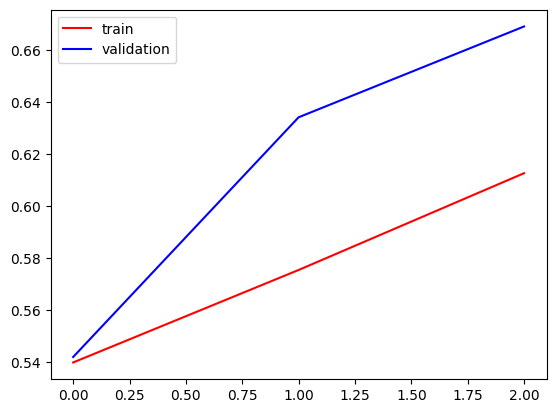

In [12]:
#Plotting Accuracy

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

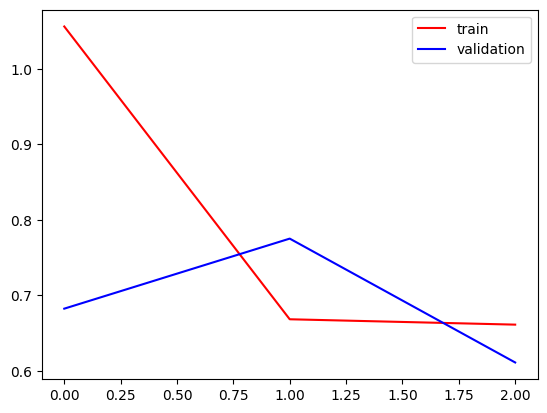

In [13]:
#Plotting Loss

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2
# Predicted Class- 1 for Dog & 0 for Cat

In [15]:
test_img = cv2.imread('/content/dog.webp')

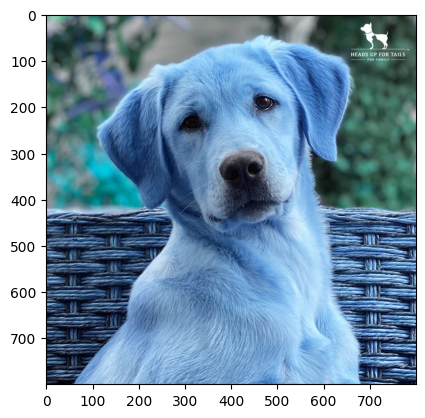

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(800, 800, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.42128378]], dtype=float32)

In [21]:
test_img2 = cv2.imread('/content/cat.jpg')

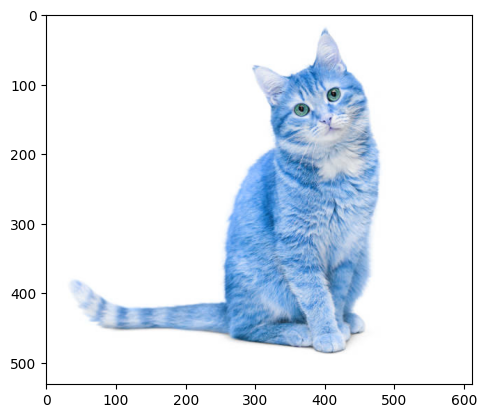

In [22]:
plt.imshow(test_img2)

In [23]:
test_img2.shape

(531, 612, 3)

In [24]:
test_img2 = cv2.resize(test_img2,(256,256))

In [25]:
test_input2 = test_img2.reshape((1,256,256,3))

In [26]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.42128378]], dtype=float32)

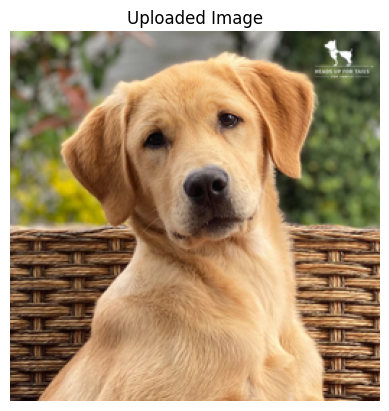

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [35]:
from google.colab import files
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image as PILImage
import tensorflow as tf

# Custom CSS Styling
display(HTML('''
<style>
  .title { font-family: 'Segoe UI', sans-serif; color: #0F766E; font-size: 32px; font-weight: bold; }
  .subtitle { color: #555; font-size: 16px; font-family: 'Segoe UI'; margin-bottom: 20px; }
  .card {
    background: #F0FDFA;
    border-left: 5px solid #14B8A6;
    padding: 20px;
    margin-top: 20px;
    border-radius: 12px;
    font-family: 'Segoe UI';
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
  }
  .confidence-bar {
    height: 20px;
    background: #E0F2F1;
    border-radius: 10px;
    margin-top: 10px;
    overflow: hidden;
  }
  .confidence-fill {
    height: 100%;
    background: #10B981;
    text-align: right;
    color: white;
    padding-right: 8px;
    line-height: 20px;
    font-size: 14px;
    font-weight: bold;
    border-radius: 10px;
  }
</style>
'''))

# Title
display(HTML("<div class='title'>🐾 AI Dog vs Cat Classifier</div>"))
display(HTML("<div class='subtitle'>Upload a photo, click Predict, and see the AI guess with confidence!</div>"))

# Upload & Predict Widgets
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
predict_btn = widgets.Button(description="🚀 Predict Now", button_style='success')
output_box = widgets.Output()

# UI Layout
ui = widgets.VBox([
    widgets.HTML("<b style='font-size:16px;'>📁 Step 1:</b> Upload an Image"),
    upload_widget,
    widgets.HTML("<b style='font-size:16px;'>🤖 Step 2:</b> Click Predict"),
    predict_btn,
    output_box
])
display(ui)

# Predict function
def on_predict_clicked(b):
    with output_box:
        clear_output()
        if not upload_widget.value:
            print("⚠️ Please upload an image.")
            return

        uploaded_file = list(upload_widget.value.values())[0]
        content = uploaded_file['content']
        img_pil = PILImage.open(io.BytesIO(content)).convert('RGB')
        img_resized = img_pil.resize((256, 256))
        img_array = np.array(img_resized)

        # Show uploaded image
        plt.imshow(img_array)
        plt.axis('off')
        plt.title("Uploaded Image")
        plt.show()

        # Prepare for prediction
        input_img = img_array.reshape((1, 256, 256, 3)).astype('float32') / 255.0
        pred = model.predict(input_img)[0][0]
        label = "🐶 Dog" if pred >= 0.5 else "🐱 Cat"
        confidence = pred if pred >= 0.5 else 1 - pred
        conf_percent = int(confidence * 100)

        # Display results in card
        display(HTML(f'''
            <div class='card'>
                <h3>Prediction: <span style="color: #10B981;">{label}</span></h3>
                <div class="confidence-bar">
                    <div class="confidence-fill" style="width:{conf_percent}%;">{conf_percent}%</div>
                </div>
            </div>
        '''))

# Bind button
predict_btn.on_click(on_predict_clicked)


In [33]:
model.save("cat_dog_model.h5")

In [34]:
model.save("cat_dog_model.keras")